# Section 1: Data Loading and Preprocessing

## Airbnb Dataset Analysis

This notebook handles the data loading and preprocessing for the Airbnb Dataset from Dgomonov's collection.

### Dataset Information:
- Source: Dgomonov's New York City Airbnb Open Data
- Task: Regression - predicting Airbnb listing prices
- Features: Various features including location, property type, reviews, etc.
- Target: price (listing price per night)
- Samples: ~49,000 instances (NYC Airbnb listings)

### Analysis Components:
- Data loading and exploration
- Feature analysis and visualization
- Data preprocessing and encoding
- Train/validation/test splits
- Feature scaling
- Target distribution analysis

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import helper functions
from airbnb_preprocessing_helpers import (
    setup_logging, load_airbnb_data, identify_target_variable, 
    clean_price_column, analyze_target_variable, categorize_features,
    create_airbnb_visualizations, preprocess_airbnb_data, save_preprocessing_results
)

warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Section 1: Data Loading and Preprocessing")
print("Dataset: Airbnb NYC Dataset")

📊 Section 1: Data Loading and Preprocessing
Dataset: Airbnb NYC Dataset


## Setup Logging and Output Directory

In [2]:
# Setup logging and output directory
output_dir = './Section1_Data_PreProcessing'
logger = setup_logging(output_dir)

logger.info("🏠 Starting Airbnb Dataset Preprocessing Pipeline")
logger.info("="*60)

2025-07-28 08:04:56,820 - INFO - 🏠 Starting Airbnb Dataset Preprocessing Pipeline
2025-07-28 08:04:56,822 - INFO - ============================================================


## Step 1: Load Data

In [3]:
# Load the Airbnb dataset
airbnb_data = load_airbnb_data(logger)

2025-07-28 08:04:58,278 - INFO - ==================================================
2025-07-28 08:04:58,279 - INFO - 1.1 DATA LOADING
2025-07-28 08:04:58,279 - INFO - ==================================================
2025-07-28 08:04:58,280 - INFO - Attempting to download Airbnb dataset...
2025-07-28 08:04:58,281 - INFO - Trying to download from: Kaggle API - Dgomonov Airbnb NYC
2025-07-28 08:04:59,472 - INFO - Processing Kaggle ZIP file...
2025-07-28 08:04:59,475 - INFO - Files in ZIP: ['AB_NYC_2019.csv', 'New_York_City_.png']
2025-07-28 08:04:59,476 - INFO - Reading CSV file: AB_NYC_2019.csv
2025-07-28 08:04:59,648 - INFO - Successfully downloaded dataset: New York City Airbnb Open Data from Kaggle
2025-07-28 08:04:59,649 - INFO - Dataset shape: (48895, 16)
2025-07-28 08:04:59,650 - INFO - Dataset source: New York City Airbnb Open Data from Kaggle
2025-07-28 08:04:59,651 - INFO - Dataset shape: (48895, 16)
2025-07-28 08:04:59,652 - INFO - Dataset columns: ['id', 'name', 'host_id', '

## Step 2: Identify and Clean Target Variable

In [4]:
# Identify target variable
target_column = identify_target_variable(airbnb_data, logger)

# Clean price column
airbnb_data = clean_price_column(airbnb_data, target_column, logger)

2025-07-28 08:05:11,870 - INFO - Identifying target variable for regression task...
2025-07-28 08:05:11,871 - INFO - Target variable identified: price
2025-07-28 08:05:11,871 - INFO - Cleaning target variable: price
2025-07-28 08:05:11,881 - INFO - Removed 11 rows with invalid prices
2025-07-28 08:05:11,882 - INFO - Final dataset shape: (48884, 16)


## Step 3: Analyze Target Variable

In [5]:
# Analyze target variable distribution
target_data = analyze_target_variable(airbnb_data, target_column, logger)

2025-07-28 08:05:15,082 - INFO - ==================================================
2025-07-28 08:05:15,083 - INFO - TARGET VARIABLE ANALYSIS
2025-07-28 08:05:15,084 - INFO - ==================================================
2025-07-28 08:05:15,085 - INFO - Target variable (price) statistics:
2025-07-28 08:05:15,094 - INFO - count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
2025-07-28 08:05:15,095 - INFO - 
Target variable range:
2025-07-28 08:05:15,095 - INFO -   Minimum: 10
2025-07-28 08:05:15,096 - INFO -   Maximum: 10000
2025-07-28 08:05:15,097 - INFO -   Mean: 152.76
2025-07-28 08:05:15,098 - INFO -   Median: 106.00
2025-07-28 08:05:15,099 - INFO -   Standard deviation: 240.17
2025-07-28 08:05:15,104 - INFO - 
Outliers (using IQR method): 2972 samples (6.08%)


## Step 4: Categorize Features

In [6]:
# Categorize features into numerical, categorical, text, etc.
feature_info = categorize_features(airbnb_data, target_column, logger)

2025-07-28 08:05:32,344 - INFO - ==================================================
2025-07-28 08:05:32,345 - INFO - 1.2 FEATURE ANALYSIS
2025-07-28 08:05:32,346 - INFO - ==================================================
2025-07-28 08:05:32,347 - INFO - Number of features: 15
2025-07-28 08:05:32,461 - INFO - 
Numerical features (7):
2025-07-28 08:05:32,461 - INFO -    1. latitude
2025-07-28 08:05:32,462 - INFO -    2. longitude
2025-07-28 08:05:32,462 - INFO -    3. minimum_nights
2025-07-28 08:05:32,463 - INFO -    4. number_of_reviews
2025-07-28 08:05:32,463 - INFO -    5. reviews_per_month
2025-07-28 08:05:32,464 - INFO -    6. calculated_host_listings_count
2025-07-28 08:05:32,464 - INFO -    7. availability_365
2025-07-28 08:05:32,465 - INFO - 
Categorical features (6):
2025-07-28 08:05:32,466 - INFO -    1. name
2025-07-28 08:05:32,466 - INFO -    2. host_name
2025-07-28 08:05:32,467 - INFO -    3. neighbourhood_group
2025-07-28 08:05:32,467 - INFO -    4. neighbourhood
2025-07-

## Step 5: Create Visualizations

2025-07-28 08:05:36,243 - INFO - ==================================================
2025-07-28 08:05:36,245 - INFO - 1.3 DATA VISUALIZATION
2025-07-28 08:05:36,245 - INFO - ==================================================


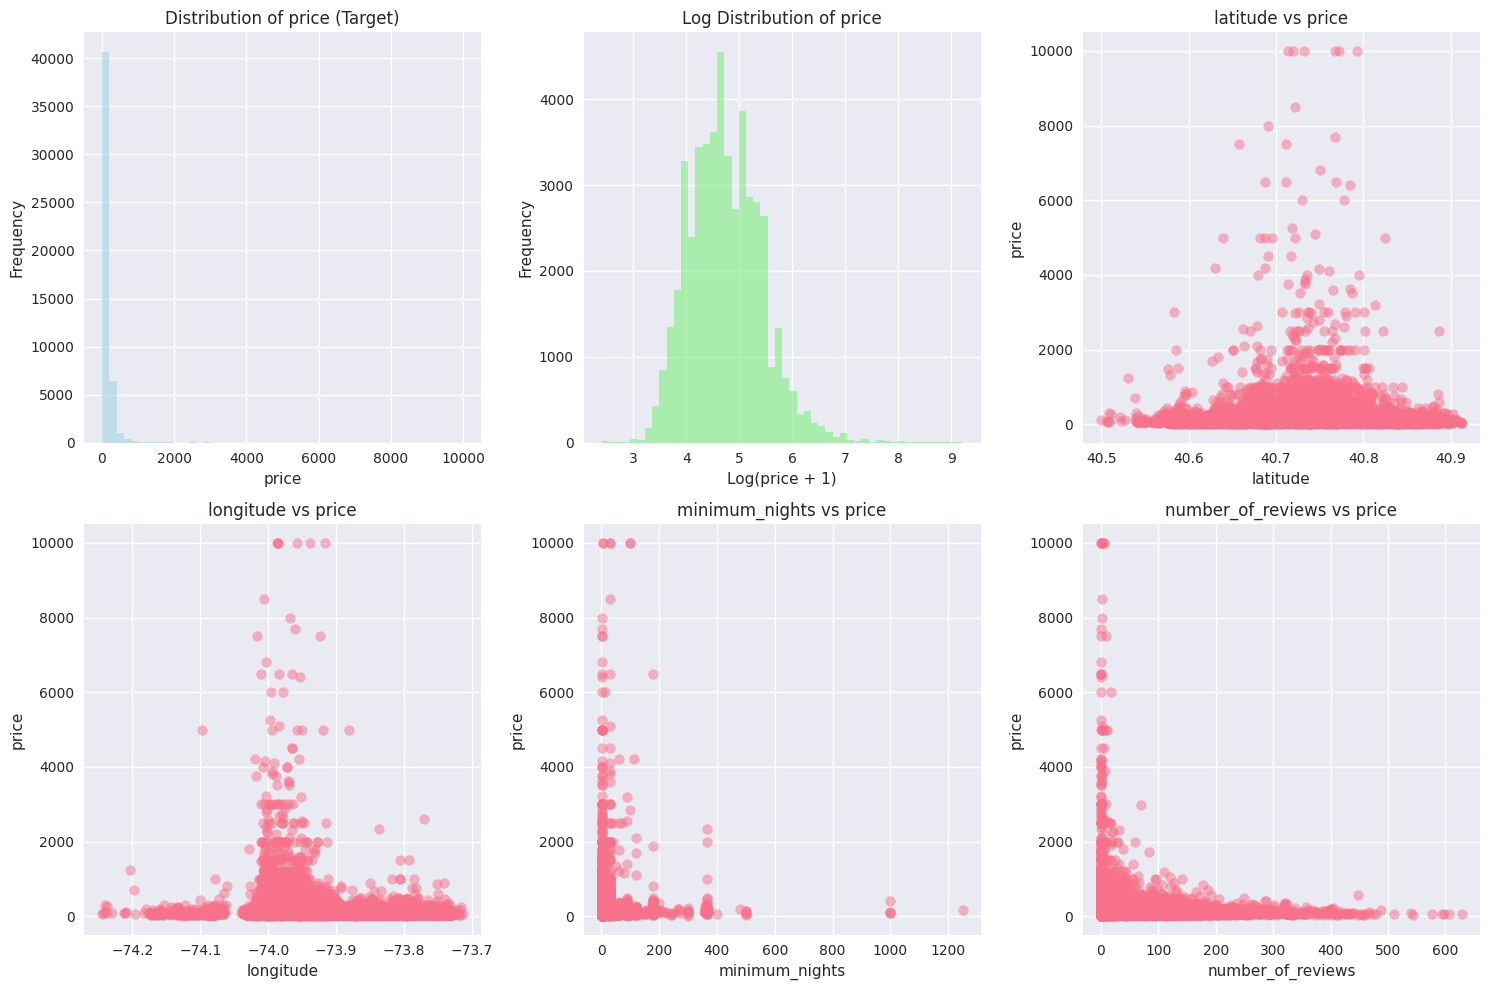

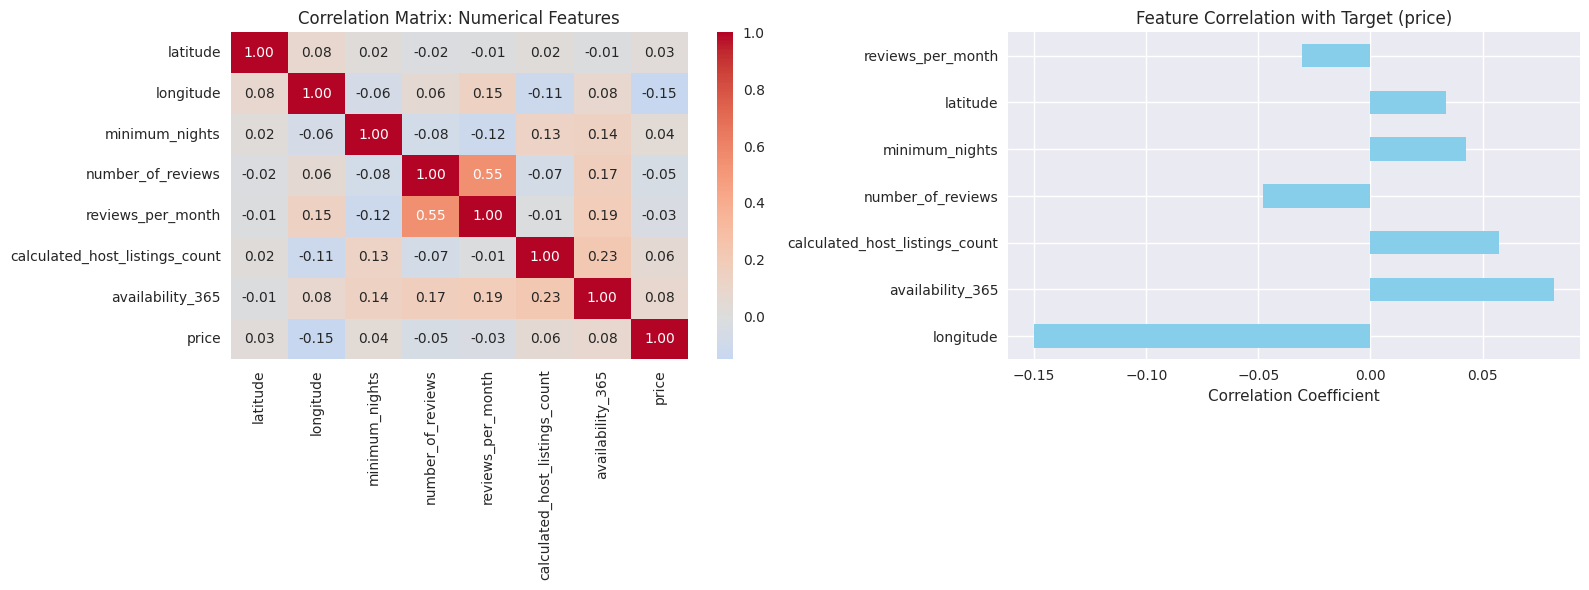

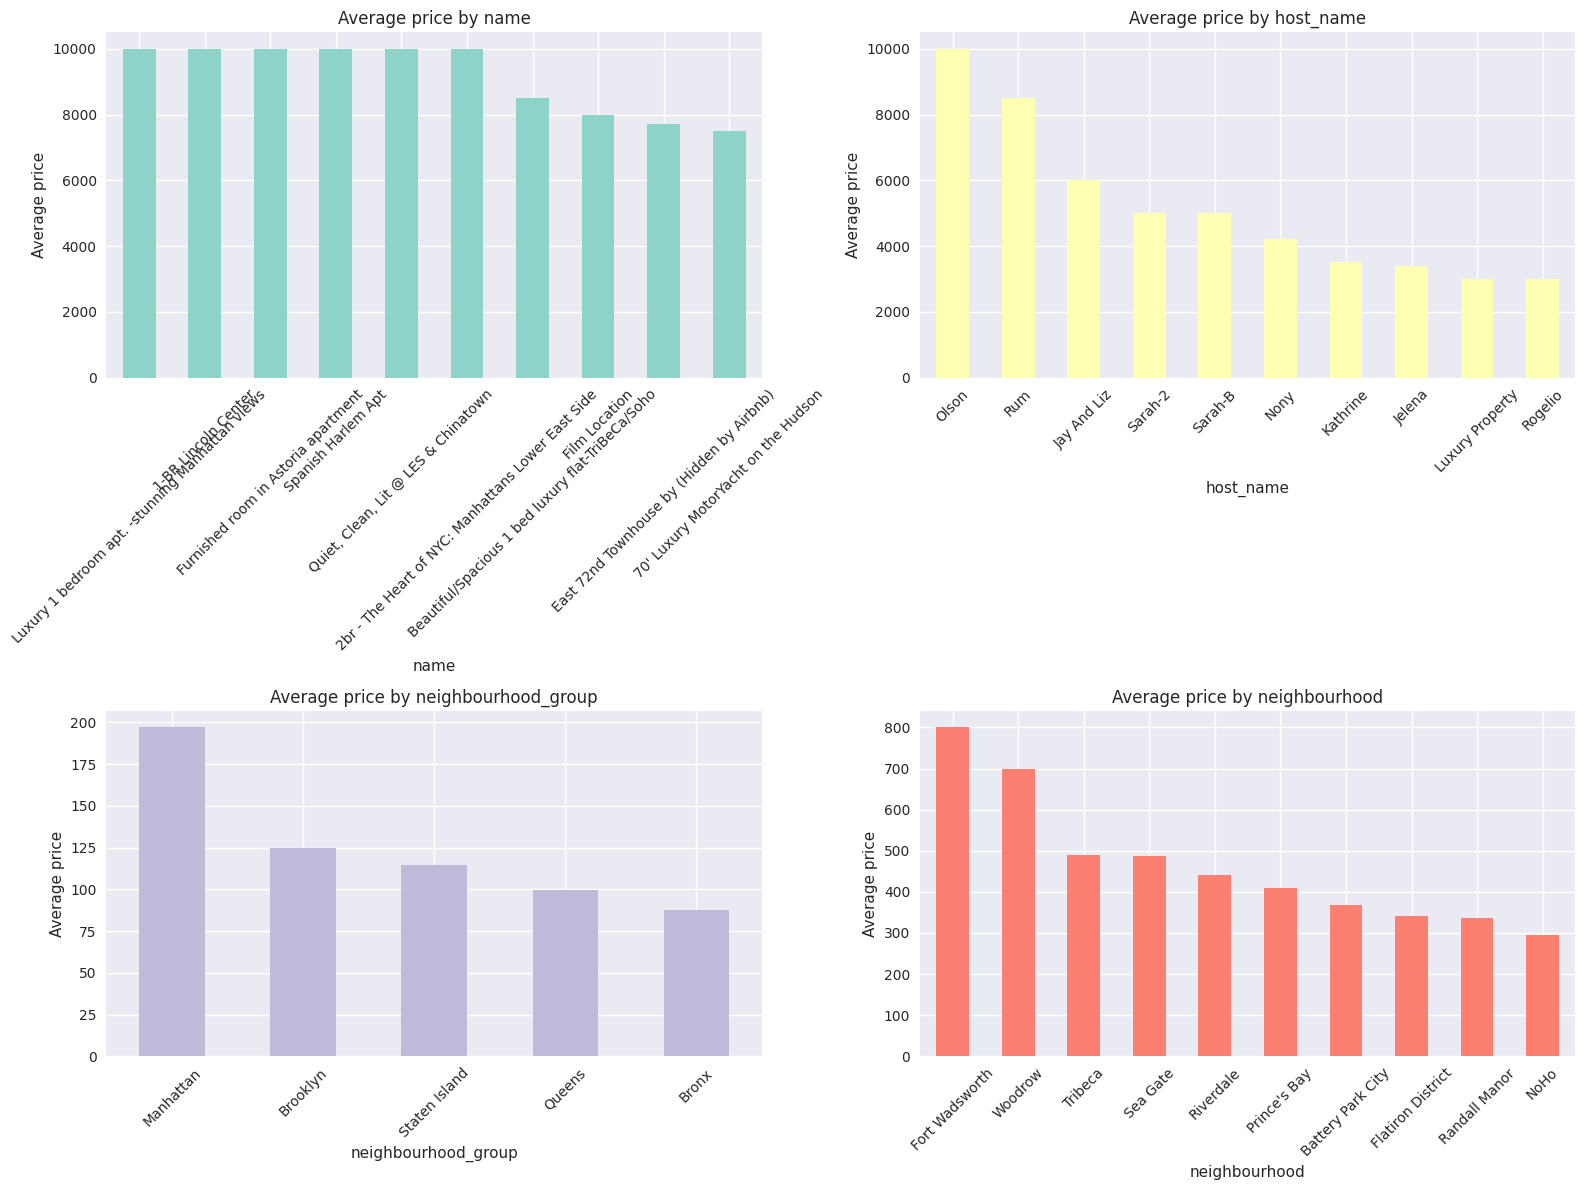

2025-07-28 08:05:45,153 - INFO - Visualizations saved successfully


In [7]:
# Create comprehensive visualizations
create_airbnb_visualizations(airbnb_data, target_column, feature_info, output_dir, logger)

## Step 6: Preprocess Data

In [8]:
# Preprocess the data (handle missing values, encode categorical features)
df, feature_names, label_encoders = preprocess_airbnb_data(airbnb_data, target_column, feature_info, logger)

2025-07-28 08:06:02,793 - INFO - ==================================================
2025-07-28 08:06:02,794 - INFO - 1.4 DATA PREPROCESSING
2025-07-28 08:06:02,795 - INFO - ==================================================
2025-07-28 08:06:02,798 - INFO - Dropping columns: ['id', 'host_id']
2025-07-28 08:06:02,802 - INFO - Handling missing values...
2025-07-28 08:06:02,806 - INFO - Filled reviews_per_month missing values with median: 0.72
2025-07-28 08:06:02,838 - INFO - Filled name missing values with mode: Hillside Hotel
2025-07-28 08:06:02,854 - INFO - Filled host_name missing values with mode: Michael
2025-07-28 08:06:02,872 - INFO - Filled last_review missing values with mode: 2019-06-23
2025-07-28 08:06:02,955 - INFO - Encoded categorical feature: name
2025-07-28 08:06:02,979 - INFO - Encoded categorical feature: host_name
2025-07-28 08:06:02,987 - INFO - Encoded categorical feature: neighbourhood_group
2025-07-28 08:06:02,996 - INFO - Encoded categorical feature: neighbourhood


## Step 7: Separate Features and Target

In [9]:
def separate_features_target(df, target_column, feature_names, logger):
    """Separate features and target variable"""
    logger.info("\n" + "="*50)
    logger.info("1.5 FEATURE-TARGET SEPARATION")
    logger.info("="*50)
    
    # Separate features and target
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    
    logger.info(f"Features shape: {X.shape}")
    logger.info(f"Target shape: {y.shape}")
    logger.info(f"Target type: Continuous (regression)")
    logger.info(f"Target range: [{y.min():.2f}, {y.max():.2f}]")
    
    # Verify feature statistics
    logger.info(f"\nFeature value ranges (first 5 features):")
    for i, feature_name in enumerate(feature_names[:5]):
        logger.info(f"  {feature_name}: [{X[:, i].min():.2f}, {X[:, i].max():.2f}]")
    if len(feature_names) > 5:
        logger.info("  ...")
    
    return X, y

# Separate features and target
X, y = separate_features_target(df, target_column, feature_names, logger)

2025-07-28 08:06:04,828 - INFO - 
2025-07-28 08:06:04,829 - INFO - 1.5 FEATURE-TARGET SEPARATION
2025-07-28 08:06:04,829 - INFO - ==================================================
2025-07-28 08:06:04,834 - INFO - Features shape: (48884, 13)
2025-07-28 08:06:04,835 - INFO - Target shape: (48884,)
2025-07-28 08:06:04,835 - INFO - Target type: Continuous (regression)
2025-07-28 08:06:04,836 - INFO - Target range: [10.00, 10000.00]
2025-07-28 08:06:04,837 - INFO - 
Feature value ranges (first 5 features):
2025-07-28 08:06:04,838 - INFO -   name: [0.00, 47893.00]
2025-07-28 08:06:04,839 - INFO -   host_name: [0.00, 11449.00]
2025-07-28 08:06:04,840 - INFO -   neighbourhood_group: [0.00, 4.00]
2025-07-28 08:06:04,840 - INFO -   neighbourhood: [0.00, 220.00]
2025-07-28 08:06:04,841 - INFO -   latitude: [40.50, 40.91]
2025-07-28 08:06:04,842 - INFO -   ...


## Step 8: Split Data

In [10]:
def split_data(X, y, logger):
    """Split data into train/validation/test sets"""
    logger.info("\n" + "="*50)
    logger.info("1.6 DATA SPLITTING")
    logger.info("="*50)
    
    # Split the data (no stratification needed for regression)
    # First split: 80% train+val, 20% test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Second split: 80% train, 20% val (of the temp set)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.2, random_state=42
    )
    
    logger.info(f"Training set: {X_train.shape}")
    logger.info(f"Validation set: {X_val.shape}")
    logger.info(f"Test set: {X_test.shape}")
    
    # Check target distribution in splits
    logger.info(f"\nTarget distribution in splits:")
    logger.info(f"Training:   Mean={y_train.mean():.2f}, Std={y_train.std():.2f}, Range=[{y_train.min():.2f}, {y_train.max():.2f}]")
    logger.info(f"Validation: Mean={y_val.mean():.2f}, Std={y_val.std():.2f}, Range=[{y_val.min():.2f}, {y_val.max():.2f}]")
    logger.info(f"Test:       Mean={y_test.mean():.2f}, Std={y_test.std():.2f}, Range=[{y_test.min():.2f}, {y_test.max():.2f}]")
    
    # Verify proportions are maintained
    total_samples = len(X)
    logger.info(f"\nData split proportions:")
    logger.info(f"  Training:   {len(y_train)} samples ({len(y_train)/total_samples*100:.1f}%)")
    logger.info(f"  Validation: {len(y_val)} samples ({len(y_val)/total_samples*100:.1f}%)")
    logger.info(f"  Test:       {len(y_test)} samples ({len(y_test)/total_samples*100:.1f}%)")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y, logger)

2025-07-28 08:06:06,536 - INFO - 
2025-07-28 08:06:06,537 - INFO - 1.6 DATA SPLITTING
2025-07-28 08:06:06,538 - INFO - ==================================================
2025-07-28 08:06:06,552 - INFO - Training set: (31285, 13)
2025-07-28 08:06:06,552 - INFO - Validation set: (7822, 13)
2025-07-28 08:06:06,553 - INFO - Test set: (9777, 13)
2025-07-28 08:06:06,553 - INFO - 
Target distribution in splits:
2025-07-28 08:06:06,555 - INFO - Training:   Mean=153.34, Std=258.18, Range=[10.00, 10000.00]
2025-07-28 08:06:06,556 - INFO - Validation: Mean=152.52, Std=209.34, Range=[10.00, 7703.00]
2025-07-28 08:06:06,557 - INFO - Test:       Mean=151.06, Std=200.09, Range=[10.00, 8000.00]
2025-07-28 08:06:06,557 - INFO - 
Data split proportions:
2025-07-28 08:06:06,558 - INFO -   Training:   31285 samples (64.0%)
2025-07-28 08:06:06,558 - INFO -   Validation: 7822 samples (16.0%)
2025-07-28 08:06:06,559 - INFO -   Test:       9777 samples (20.0%)


## Step 9: Scale Features

2025-07-28 08:06:08,141 - INFO - 
2025-07-28 08:06:08,142 - INFO - 1.7 FEATURE SCALING
2025-07-28 08:06:08,142 - INFO - ==================================================
2025-07-28 08:06:08,152 - INFO - Scaled training set: (31285, 13)
2025-07-28 08:06:08,152 - INFO - Scaled validation set: (7822, 13)
2025-07-28 08:06:08,153 - INFO - Scaled test set: (9777, 13)
2025-07-28 08:06:08,153 - INFO - 
Scaling verification (training set):
2025-07-28 08:06:08,155 - INFO -   Mean (should be ~0): [-8.64401868e-17  8.78454875e-17 -3.25817898e-15]...
2025-07-28 08:06:08,160 - INFO -   Std (should be ~1):  [1. 1. 1.]...
2025-07-28 08:06:08,161 - INFO - 
Scaling effect on sample features:
2025-07-28 08:06:08,161 - INFO -   name:
2025-07-28 08:06:08,163 - INFO -     Original range: [2.00, 47892.00]
2025-07-28 08:06:08,163 - INFO -     Scaled range:   [-1.73, 1.73]
2025-07-28 08:06:08,164 - INFO -   host_name:
2025-07-28 08:06:08,165 - INFO -     Original range: [1.00, 11448.00]
2025-07-28 08:06:08,16

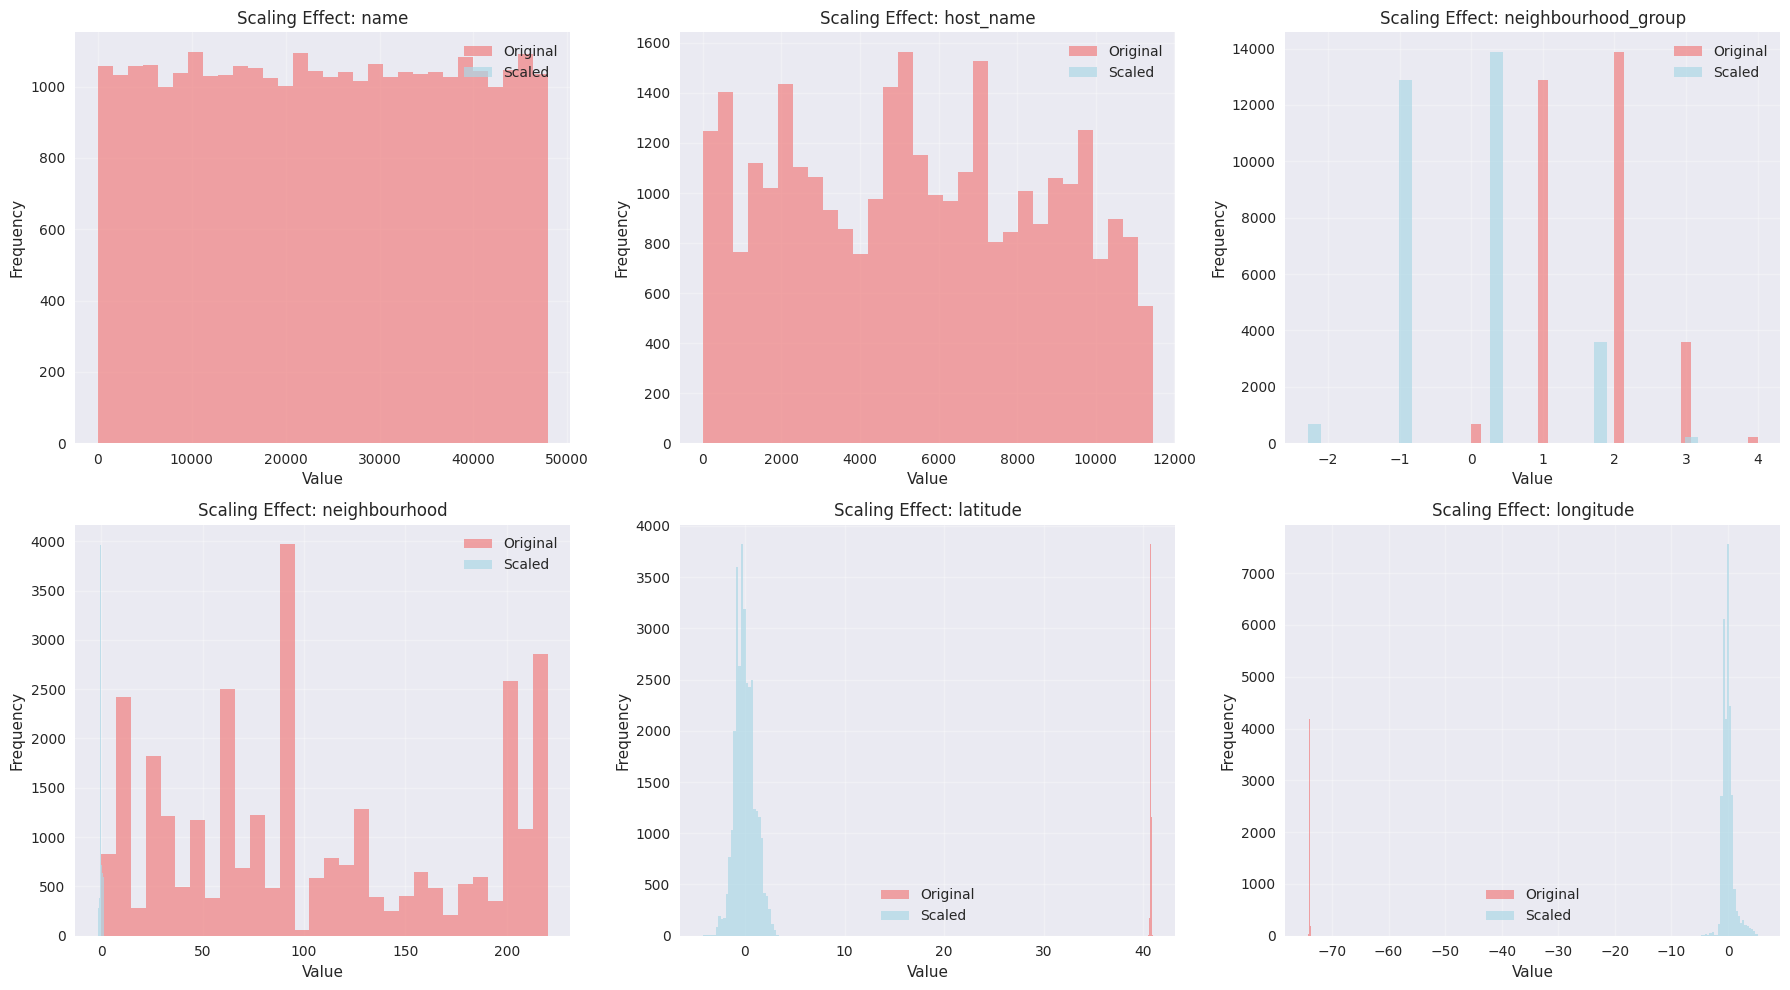

In [11]:
def scale_features(X_train, X_val, X_test, feature_names, output_dir, logger):
    """Scale features using StandardScaler"""
    logger.info("\n" + "="*50)
    logger.info("1.7 FEATURE SCALING")
    logger.info("="*50)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    logger.info(f"Scaled training set: {X_train_scaled.shape}")
    logger.info(f"Scaled validation set: {X_val_scaled.shape}")
    logger.info(f"Scaled test set: {X_test_scaled.shape}")
    
    # Verify scaling worked correctly
    logger.info(f"\nScaling verification (training set):")
    logger.info(f"  Mean (should be ~0): {X_train_scaled.mean(axis=0)[:3]}...")
    logger.info(f"  Std (should be ~1):  {X_train_scaled.std(axis=0)[:3]}...")
    
    # Show scaling effect on sample features
    sample_features_idx = [0, 1, 2]  # First 3 features
    logger.info(f"\nScaling effect on sample features:")
    for idx in sample_features_idx:
        if idx < len(feature_names):
            feature_name = feature_names[idx]
            logger.info(f"  {feature_name}:")
            logger.info(f"    Original range: [{X_train[:, idx].min():.2f}, {X_train[:, idx].max():.2f}]")
            logger.info(f"    Scaled range:   [{X_train_scaled[:, idx].min():.2f}, {X_train_scaled[:, idx].max():.2f}]")
    
    # Visualize scaling effect
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    # Select features to visualize scaling effect (first 6 features)
    features_to_plot = feature_names[:6]
    
    for i, feature_name in enumerate(features_to_plot):
        if i >= 6:
            break
        feature_idx = i
        
        # Original data
        axes[i].hist(X_train[:, feature_idx], bins=30, alpha=0.7, label='Original', color='lightcoral')
        # Scaled data
        axes[i].hist(X_train_scaled[:, feature_idx], bins=30, alpha=0.7, label='Scaled', color='lightblue')
        
        axes[i].set_title(f'Scaling Effect: {feature_name}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'feature_scaling_effect.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    return X_train_scaled, X_val_scaled, X_test_scaled, scaler

# Scale the features
X_train_scaled, X_val_scaled, X_test_scaled, scaler = scale_features(
    X_train, X_val, X_test, feature_names, output_dir, logger
)

## Step 10: Create Summary and Export

In [12]:
def create_summary_and_export(airbnb_data, target_column, X_train, X_val, X_test, y_train, y_val, y_test, 
                             X_train_scaled, X_val_scaled, X_test_scaled, feature_names, 
                             feature_info, scaler, y, output_dir, logger):
    """Create data summary and export preprocessed data"""
    logger.info("\n" + "="*50)
    logger.info("1.8 DATA SUMMARY AND EXPORT")
    logger.info("="*50)
    
    # Create comprehensive data summary
    data_summary = {
        'dataset_info': {
            'name': 'Airbnb NYC Dataset',
            'source': 'Dgomonov New York City Airbnb Open Data',
            'total_samples': len(airbnb_data),
            'num_features': len(feature_names),
            'task_type': 'Regression',
            'target_variable': target_column,
            'target_range': [float(y.min()), float(y.max())],
            'target_mean': float(y.mean()),
            'target_std': float(y.std())
        },
        'data_splits': {
            'train_size': len(X_train),
            'val_size': len(X_val),
            'test_size': len(X_test),
            'train_ratio': len(X_train) / len(airbnb_data),
            'val_ratio': len(X_val) / len(airbnb_data),
            'test_ratio': len(X_test) / len(airbnb_data)
        },
        'target_distribution': {
            'train_mean': float(y_train.mean()),
            'val_mean': float(y_val.mean()),
            'test_mean': float(y_test.mean()),
            'train_std': float(y_train.std()),
            'val_std': float(y_val.std()),
            'test_std': float(y_test.std())
        },
        'feature_info': {
            'feature_names': feature_names,
            'numerical_features': feature_info['numerical'],
            'categorical_features': feature_info['categorical']
        }
    }
    
    logger.info("📊 DATA PREPROCESSING SUMMARY")
    logger.info("=" * 50)
    logger.info(f"Dataset: {data_summary['dataset_info']['name']}")
    logger.info(f"Total Samples: {data_summary['dataset_info']['total_samples']:,}")
    logger.info(f"Features: {data_summary['dataset_info']['num_features']}")
    logger.info(f"Task Type: {data_summary['dataset_info']['task_type']}")
    logger.info(f"Target Variable: {data_summary['dataset_info']['target_variable']}")
    logger.info(f"Target Range: [{data_summary['dataset_info']['target_range'][0]:.2f}, {data_summary['dataset_info']['target_range'][1]:.2f}]")
    logger.info(f"Target Mean: {data_summary['dataset_info']['target_mean']:.2f}")
    logger.info(f"Target Std: {data_summary['dataset_info']['target_std']:.2f}")
    logger.info(f"\nData Splits:")
    logger.info(f"  Training:   {data_summary['data_splits']['train_size']:,} ({data_summary['data_splits']['train_ratio']:.1%})")
    logger.info(f"  Validation: {data_summary['data_splits']['val_size']:,} ({data_summary['data_splits']['val_ratio']:.1%})")
    logger.info(f"  Test:       {data_summary['data_splits']['test_size']:,} ({data_summary['data_splits']['test_ratio']:.1%})")
    logger.info(f"\nTarget Distribution:")
    logger.info(f"  Train Mean: {data_summary['target_distribution']['train_mean']:.2f}")
    logger.info(f"  Val Mean: {data_summary['target_distribution']['val_mean']:.2f}")
    logger.info(f"  Test Mean: {data_summary['target_distribution']['test_mean']:.2f}")
    
    logger.info(f"\n✅ Data preprocessing completed successfully!")
    logger.info(f"📁 Ready for model training in Section 2")
    
    # Save preprocessed data for use in other scripts
    preprocessing_data = {
        'X_train_scaled': X_train_scaled,
        'X_val_scaled': X_val_scaled,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'feature_names': feature_names,
        'scaler': scaler,
        'data_summary': data_summary
    }
    
    # Save using helper function
    pickle_file, csv_file = save_preprocessing_results(
        preprocessing_data, output_dir, 'airbnb', logger
    )
    
    return data_summary, preprocessing_data

# Create summary and export results
data_summary, preprocessing_data = create_summary_and_export(
    airbnb_data, target_column, X_train, X_val, X_test, y_train, y_val, y_test,
    X_train_scaled, X_val_scaled, X_test_scaled, feature_names,
    feature_info, scaler, y, output_dir, logger
)

2025-07-28 08:06:11,433 - INFO - 
2025-07-28 08:06:11,434 - INFO - 1.8 DATA SUMMARY AND EXPORT
2025-07-28 08:06:11,434 - INFO - ==================================================
2025-07-28 08:06:11,436 - INFO - 📊 DATA PREPROCESSING SUMMARY
2025-07-28 08:06:11,437 - INFO - ==================================================
2025-07-28 08:06:11,437 - INFO - Dataset: Airbnb NYC Dataset
2025-07-28 08:06:11,438 - INFO - Total Samples: 48,884
2025-07-28 08:06:11,438 - INFO - Features: 13
2025-07-28 08:06:11,439 - INFO - Task Type: Regression
2025-07-28 08:06:11,439 - INFO - Target Variable: price
2025-07-28 08:06:11,440 - INFO - Target Range: [10.00, 10000.00]
2025-07-28 08:06:11,440 - INFO - Target Mean: 152.76
2025-07-28 08:06:11,441 - INFO - Target Std: 240.17
2025-07-28 08:06:11,442 - INFO - 
Data Splits:
2025-07-28 08:06:11,442 - INFO -   Training:   31,285 (64.0%)
2025-07-28 08:06:11,443 - INFO -   Validation: 7,822 (16.0%)
2025-07-28 08:06:11,443 - INFO -   Test:       9,777 (20.0%)
2

## Pipeline Completion

In [13]:
logger.info("\n🎉 Preprocessing pipeline completed successfully!")
logger.info("📊 Data is ready for XGBoost, FT-Transformer, SAINT, and TabTransformer model training")

print("\n" + "="*60)
print("🎉 AIRBNB DATA PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"📊 Dataset: {data_summary['dataset_info']['name']}")
print(f"📈 Total Samples: {data_summary['dataset_info']['total_samples']:,}")
print(f"🔢 Features: {data_summary['dataset_info']['num_features']}")
print(f"🎯 Target: {data_summary['dataset_info']['target_variable']}")
print(f"💾 Output saved to: {output_dir}")
print("📁 Ready for model training in Section 2!")

2025-07-28 08:06:17,879 - INFO - 
🎉 Preprocessing pipeline completed successfully!
2025-07-28 08:06:17,880 - INFO - 📊 Data is ready for XGBoost, FT-Transformer, SAINT, and TabTransformer model training



🎉 AIRBNB DATA PREPROCESSING COMPLETED SUCCESSFULLY!
📊 Dataset: Airbnb NYC Dataset
📈 Total Samples: 48,884
🔢 Features: 13
🎯 Target: price
💾 Output saved to: ./Section1_Data_PreProcessing
📁 Ready for model training in Section 2!
